# **0. Introduction and Objectives:**

### Project Goal: to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck while analysing differnt factors that led to our predictor to achive this result

# **1. Data loading**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data=pd.read_csv("/kaggle/input/titanic/train_and_test2.csv")
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


# **2. Exploratory Data Analysis**

## **2.0 EDA Objectives: Titanic Survivor Predictor**

The primary goal of this Exploratory Data Analysis (EDA) is to thoroughly understand the Titanic dataset in preparation for building a model that can predict passenger survival. Specifically, this EDA aims to:

* **Understand the Characteristics of Each Feature:**
    * Analyze the distribution, central tendency, and spread of individual features such as `PassengerId`, `Survived`, `Pclass`, `Name`, `Sex`, `Age`, `SibSp`, `Parch`, `Ticket`, `Fare`, `Cabin`, and `Embarked`.
    * Identify the data type of each feature and any potential inconsistencies.
    * Gain an initial understanding of the range and variability of values within each feature.

* **Identify Missing Values and Outliers:**
    * Determine the presence and extent of missing data in each column.
    * Analyze the patterns of missingness to understand if it's random or related to other features.
    * Detect potential outliers in numerical features like `Age` and `Fare` that might require further investigation or handling.

* **Explore Relationships Between Features:**
    * Investigate the relationships between different passenger features (e.g., `Pclass` and `Fare`, `Age` and `Pclass`, `SibSp` and `Parch`).
    * Analyze correlations between numerical features to identify potential dependencies.
    * Examine the relationship between categorical features using cross-tabulations.

* **Gain Insights into the Target Variable (`Survived`):**
    * Determine the overall survival rate in the dataset.
    * Analyze the distribution of survivors and non-survivors across different passenger demographics and characteristics (e.g., by `Sex`, `Pclass`, `Age`, `Embarked`).

* **Formulate Initial Hypotheses About Potential Predictors of Survival:**
    * Based on the observed relationships, develop initial hypotheses about which features are likely to be strong predictors of survival. For example, "Passengers in higher classes had a higher survival rate," or "Female passengers were more likely to survive."

* **Identify Potential Data Quality Issues:**
    * Uncover any inconsistencies, errors, or unusual patterns in the data that might need to be addressed during data preprocessing. This could include inconsistent formatting, illogical values, or data entry errors.

In [3]:
data.tail()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1308,1309,28.0,22.3583,0,1,0,0,0,0,0,...,0,0,0,3,0,0,0.0,0,0,0


In [4]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

Data Dictionary

    Passengerid: Unique identifier for each passenger.
    Age: Age of the passenger.
    Fare: Fare paid by the passenger.
    Sex: Gender of the passenger.
    sibsp: Number of siblings/spouses aboard.
    zero: Placeholder column (potentially unused or for future data).
    zero.1: Placeholder column.
    zero.2: Placeholder column.
    zero.3: Placeholder column.
    zero.4: Placeholder column.
    zero.5: Placeholder column.
    zero.6: Placeholder column.
    Parch: Number of parents/children aboard.
    zero.7: Placeholder column.
    zero.8: Placeholder column.
    zero.9: Placeholder column.
    zero.10: Placeholder column.
    zero.11: Placeholder column.
    zero.12: Placeholder column.
    zero.13: Placeholder column.
    zero.14: Placeholder column.
    Pclass: Passenger class (1st, 2nd, or 3rd).
    zero.15: Placeholder column.
    zero.16: Placeholder column.
    Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).
    zero.17: Placeholder column.
    zero.18: Placeholder column.
    2urvived: Survival status (0 = No; 1 = Yes).


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [6]:
data.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [7]:
data["Sex"].nunique()

2

In [8]:
data["Passengerid"].nunique()

1309

In [9]:
data.isnull().sum().sum()

2

# unitial evaluation
_ the initial  tell us some information on age, fare and PassengerID
  1. on age: the min age 0.17 ,tell us the on board there a newborn in ship and there were also an old man of 80 years old.
  2. on fare: the is a high gap  and high disproportion on price , there were also those who were not charged likely the the board crew.
  3. On PassengerID: the high cardinality of it tell us that it won't be helpfull to include it in our next investigation
we will have to deep dive in each feature ,especially caterigocal features
-we found also two nulls valus in embark feature that will have to  be dealt with
-there are also zero.(0-18) that we don't have any clue about

## **2.2 Univariante analysis**

In [10]:
df=data.copy()

## **2.2.0 Univariante analysis for numerical values**

--- Analyzing Age ---


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


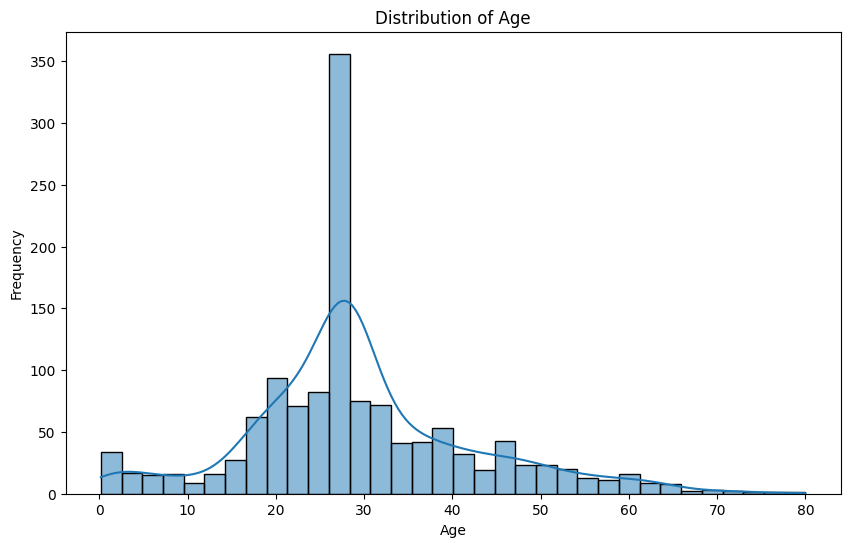

In [11]:
print("--- Analyzing Age ---")
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


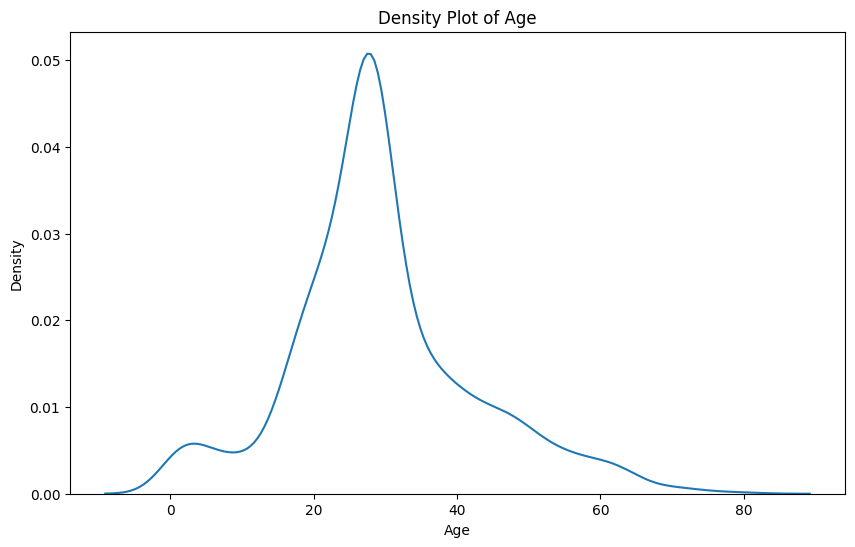

In [12]:
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Age'])
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

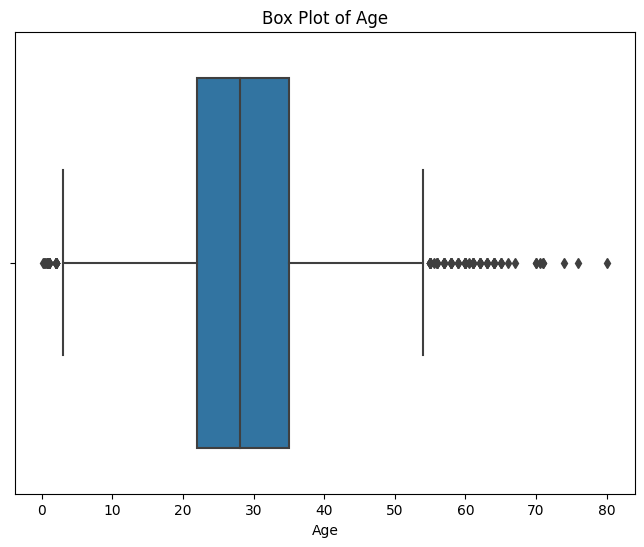

In [13]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()


--- Analyzing Fare ---


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


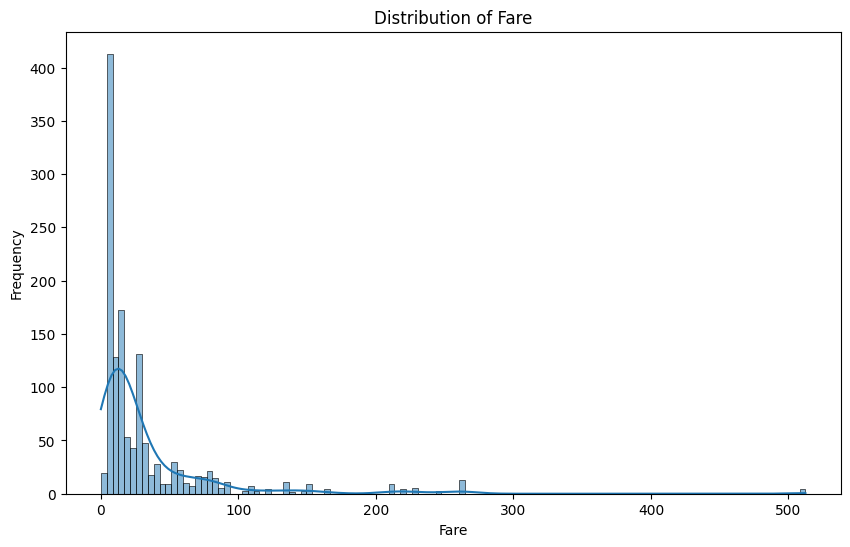

In [15]:
print("\n--- Analyzing Fare ---")
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


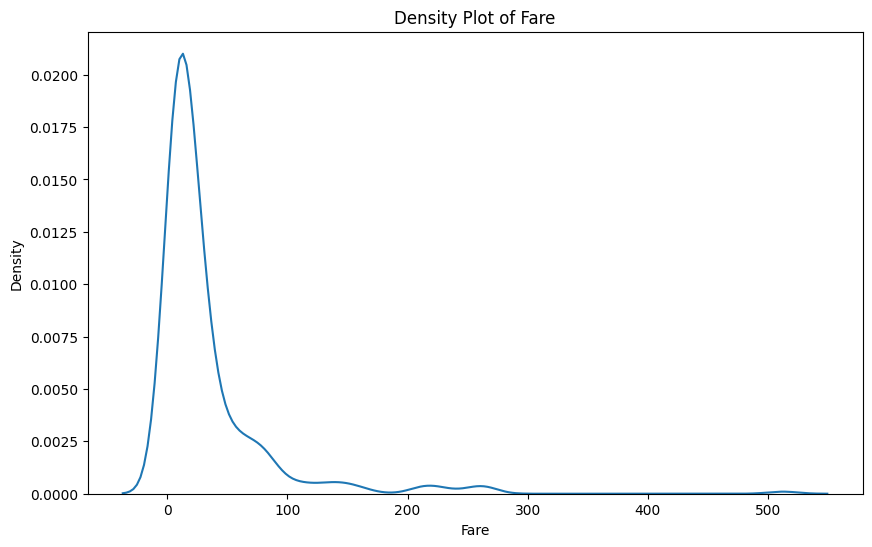

In [16]:
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Fare'])
plt.title('Density Plot of Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()


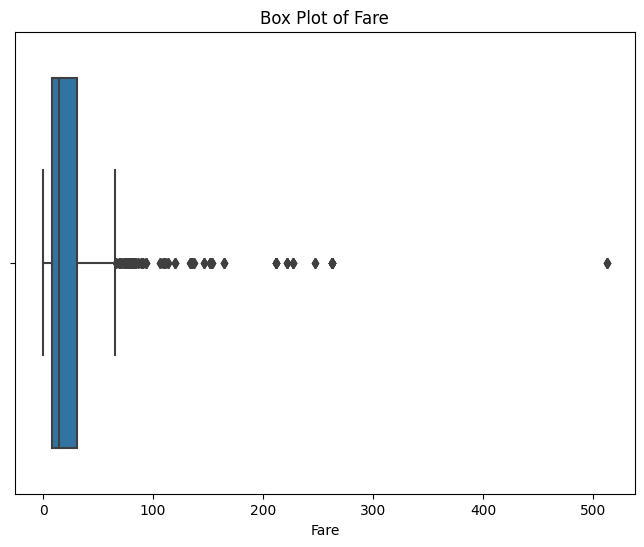

In [17]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fare'])
plt.title('Box Plot of Fare')
plt.xlabel('Fare')
plt.show()


--- Analyzing sibsp (Number of Siblings/Spouses Aboard) ---

Value Counts for sibsp:
sibsp
0    891
1    319
2     42
3     20
4     22
5      6
8      9
Name: count, dtype: int64


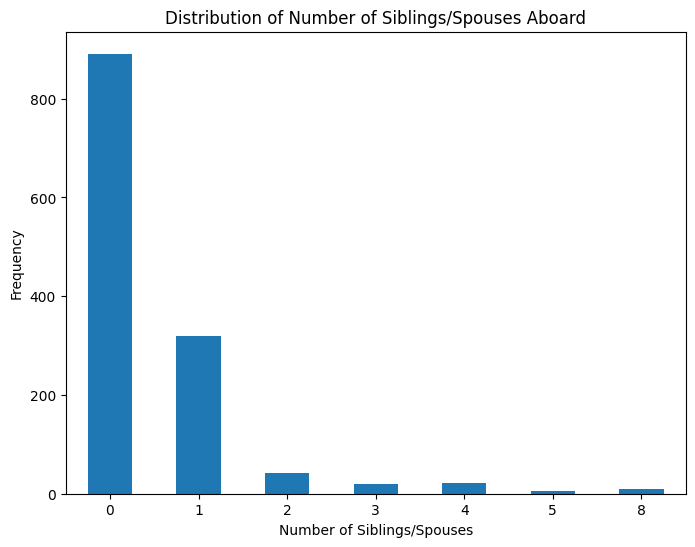

In [18]:
print("\n--- Analyzing sibsp (Number of Siblings/Spouses Aboard) ---")
# Value Counts
print("\nValue Counts for sibsp:")
print(df['sibsp'].value_counts().sort_index())

# Bar Chart
plt.figure(figsize=(8, 6))
df['sibsp'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()



--- Analyzing Parch (Number of Parents/Children Aboard) ---

Value Counts for Parch:
Parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: count, dtype: int64


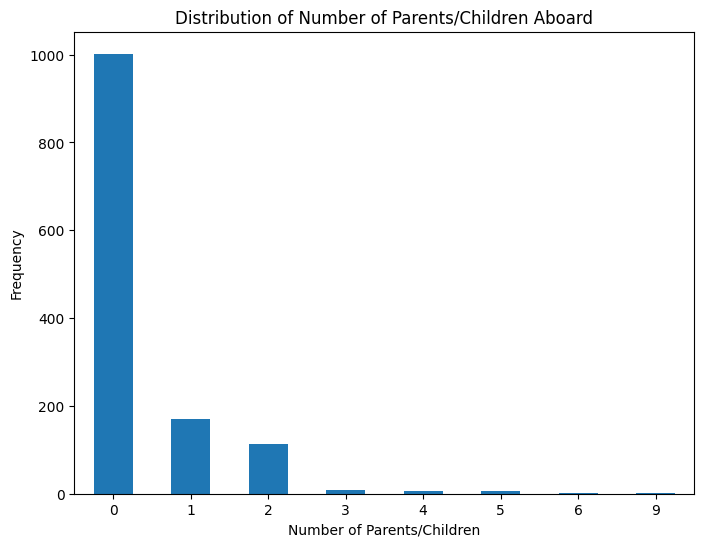


--- Summary Statistics for Age, Fare, sibsp, and Parch ---
               Age         Fare        sibsp        Parch
count  1309.000000  1309.000000  1309.000000  1309.000000
mean     29.503186    33.281086     0.498854     0.385027
std      12.905241    51.741500     1.041658     0.865560
min       0.170000     0.000000     0.000000     0.000000
25%      22.000000     7.895800     0.000000     0.000000
50%      28.000000    14.454200     0.000000     0.000000
75%      35.000000    31.275000     1.000000     0.000000
max      80.000000   512.329200     8.000000     9.000000


In [19]:
print("\n--- Analyzing Parch (Number of Parents/Children Aboard) ---")
# Value Counts
print("\nValue Counts for Parch:")
print(df['Parch'].value_counts().sort_index())

# Bar Chart
plt.figure(figsize=(8, 6))
df['Parch'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

print("\n--- Summary Statistics for Age, Fare, sibsp, and Parch ---")
print(df[['Age', 'Fare', 'sibsp', 'Parch']].describe())

## **2.2.1 Univariante analysis for categorical value**

In [17]:
print("--- Analyzing Sex ---")
print("\n proportionality on sex features :",df["Sex"].value_counts())


--- Analyzing Sex ---

 proportionality on sex features : Sex
0    843
1    466
Name: count, dtype: int64


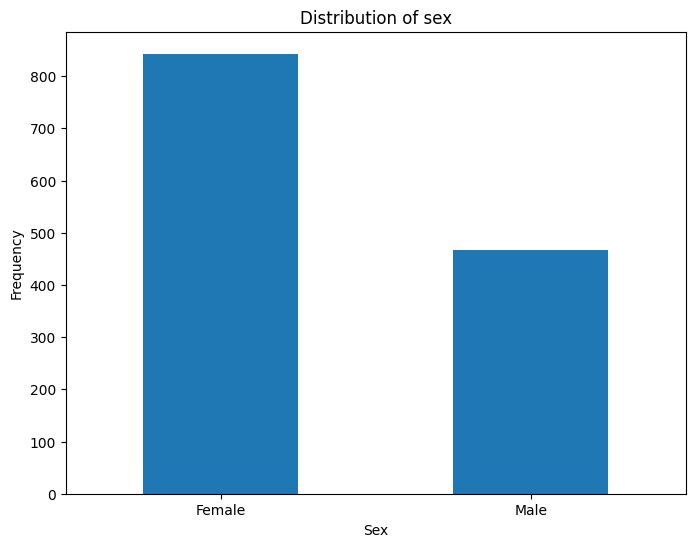

In [29]:
# bar chart 
plt.figure(figsize=(8,6))
df["Sex"].value_counts().sort_index().plot(kind="bar",rot=0)
plt.title("Distribution of sex")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.xticks(ticks=[0,1], labels=["Female","Male"])
plt.show()


In [21]:
print("------Analyzing Pclass------")

------Analyzing Pclass------


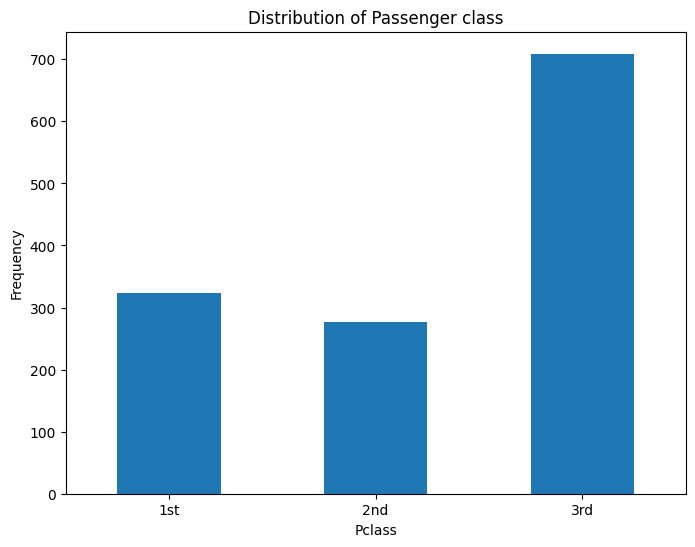

In [22]:
plt.figure(figsize=(8,6))
df["Pclass"].value_counts().sort_index().plot(kind="bar",rot=0)
plt.title("Distribution of Passenger class")
plt.xlabel("Pclass")
plt.ylabel("Frequency")
plt.xticks(ticks=[0,1,2],labels=['1st','2nd','3rd'])
plt.show()


In [23]:
print("--------Analyzing Embark---------")

--------Analyzing Embark---------


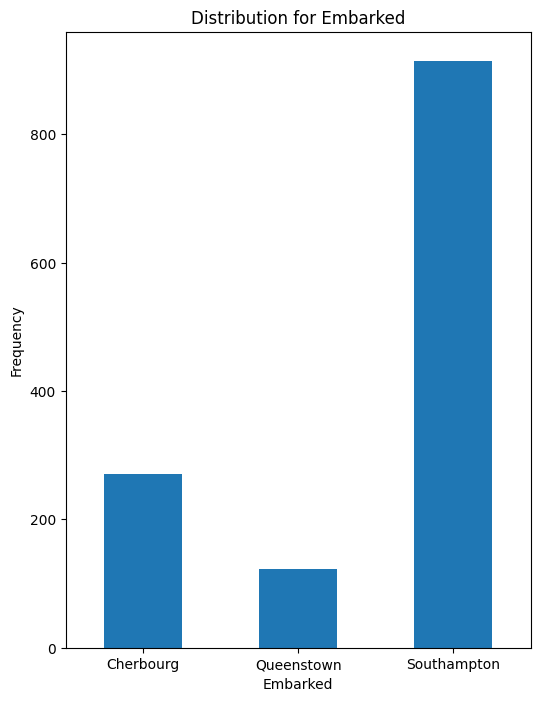

In [27]:
plt.figure(figsize=(6,8))
df["Embarked"].value_counts().sort_index().plot(kind="bar",rot=0)
plt.title("Distribution for Embarked")
plt.xlabel("Embarked")
plt.ylabel("Frequency")
plt.xticks(ticks=[0.0,1.0,2.0],labels=["Cherbourg","Queenstown","Southampton"])
plt.show()

## **2.2.2 Analyse the target variable**

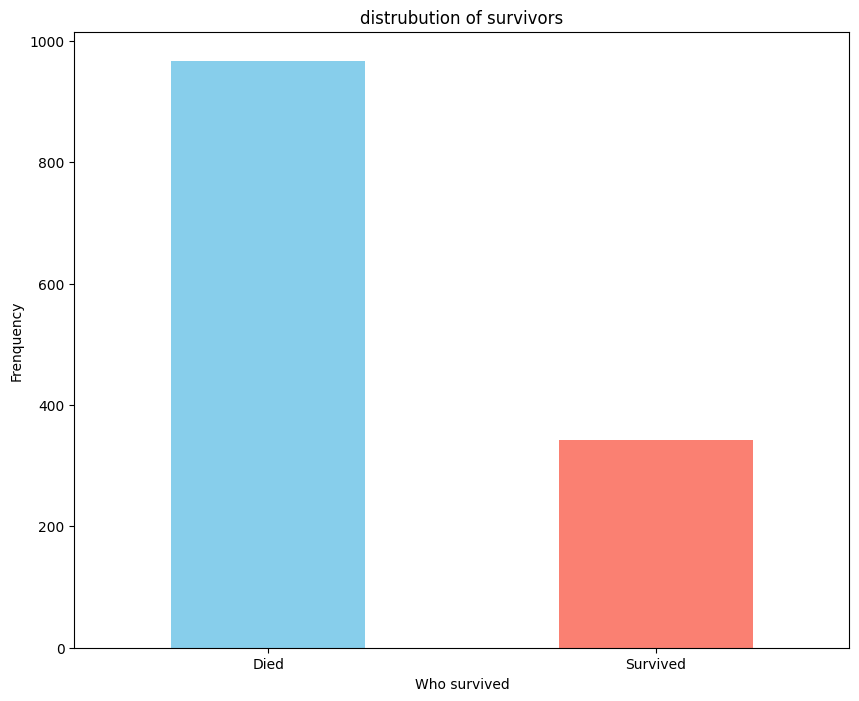

In [30]:
plt.figure(figsize=(10,8))
df["2urvived"].value_counts().sort_index().plot(kind="bar",rot=0,color=['skyblue', 'salmon'])
plt.title("distrubution of survivors")
plt.xlabel("Who survived")
plt.ylabel("Frenquency")
plt.xticks(ticks=[0,1],labels=["Died","Survived"])
plt.show()


### Summary of Univariate Analysis Findings:

**Numerical Features:**

* **Age:** The median age of passengers is around 29 years, indicating a central tendency in this range. The presence of newborns and older individuals suggests a wide age range. The age distribution appears roughly normal, although there are notable outliers present.
* **Fare:** The distribution of fare prices is positively skewed, indicating that most passengers paid lower fares, with a tail extending towards higher prices. Outliers are present, representing very expensive tickets. The significant spread in fare values highlights a large disparity in ticket prices.
* **sibsp (Number of Siblings/Spouses Aboard):** The majority of passengers traveled without any siblings or spouses. Among those who did, having one sibling or spouse was the most common. The maximum number of siblings/spouses recorded was 8, suggesting some large family groups.
* **Parch (Number of Parents/Children Aboard):** Similar to `sibsp`, most passengers did not have parents or children on board. When they did, having one parent or child was frequent. The observation that the pattern in `Parch` mirrors `sibsp` suggests a potential correlation between these two features, indicating that passengers traveling with siblings/spouses were also likely to be traveling with parents/children, representing family units.

**Categorical Features:**

* **Sex:** The number of female passengers in the dataset was almost double the number of male passengers.
* **Pclass (Passenger Class):** A significant portion of the passengers traveled in 3rd class. (Note: In the historical context of the Titanic, 3rd class was the lowest class, while 1st was the highest. This might be a specific interpretation or modification in your dataset).
* **Embarked (Port of Embarkation):** The most common port of embarkation for passengers was Southampton ('S'), which was the last port of departure for the Titanic.

**Target Variable (2urvived):**

* The distribution of the target variable reveals that a significant number of passengers did not survive the Titanic disaster. The bar chart showed a higher frequency for the 'Died' category compared to the 'Survived' category, indicating that the majority of passengers in this dataset perished.